In [1]:
import pandas as pd
import os
import numpy as np
import warnings
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.metrics import roc_auc_score
pd.options.display.max_columns = 100
pd.options.display.max_rows = 999
warnings.simplefilter('ignore', FutureWarning)
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [2]:
import matplotlib.pyplot as plt

def scatter(dataset, column):
    plt.figure()
    plt.scatter(dataset[column] , dataset['Cantidad'])
    plt.ylabel('Cantidad')
    plt.xlabel(column)

In [3]:
def plot_feature_importances(df, threshold = 0.9):
    """
    Plots 30 most important features and the cumulative importance of features.
    Prints the number of features needed to reach threshold cumulative importance.
    
    Parameters
    --------
    df : dataframe
        Dataframe of feature importances. Columns must be feature and importance
    threshold : float, default = 0.9
        Threshold for prining information about cumulative importances
        
    Return
    --------
    df : dataframe
        Dataframe ordered by feature importances with a normalized column (sums to 1)
        and a cumulative importance column
    
    """
    
    plt.rcParams['font.size'] = 12
    
    # Sort features according to importance
    df = df.sort_values('importance', ascending = False).reset_index()
    
    # Normalize the feature importances to add up to one
    df['importance_normalized'] = df['importance'] / df['importance'].sum()
    df['cumulative_importance'] = np.cumsum(df['importance_normalized'])

    # Make a horizontal bar chart of feature importances
    plt.figure(figsize = (10, 6))
    ax = plt.subplot()
    
    # Need to reverse the index to plot most important on top
    ax.barh(list(reversed(list(df.index[:30]))), 
            df['importance_normalized'].head(30), 
            align = 'center', edgecolor = 'k')
    
    # Set the yticks and labels
    ax.set_yticks(list(reversed(list(df.index[:30]))))
    ax.set_yticklabels(df['feature'].head(30))
    
    # Plot labeling
    plt.xlabel('Variables explicativas'); plt.title('Importancia de las variables explicativas')
    plt.show()
    
    # Cumulative importance plot
    plt.figure(figsize = (8, 6))
    plt.plot(list(range(len(df))), df['cumulative_importance'], 'r-')
    plt.xlabel('Cantidad de variables explicativas'); plt.ylabel('Importancia acumulada'); 
    plt.title('Importancia acumulada');
    plt.show();
    
    importance_index = np.min(np.where(df['cumulative_importance'] > threshold))
    print('%d features required for %0.2f of cumulative importance' % (importance_index + 1, threshold))
    
    return df

In [4]:
import pandas as pd
novedades=pd.read_csv('~/Dropbox/KLACmod.csv')

In [5]:
#novedades['Cantidad'] = novedades['Cantidad'] .apply(lambda x: np.log(x + 1 + log_constant))


In [6]:
novedades.set_index('date', inplace=True)

In [7]:
novedades.head()

,open,open_1,close_1,high_1,low_1,volume_1,H-L,O-C,avg_price_5,avg_price_30,avg_price_365,ratio_avg_price_5_30,ratio_avg_price_5_365,ratio_avg_price_30_365,avg_volume_5,avg_volume_30,avg_volume_365,ratio_avg_volume_5_30,ratio_avg_volume_5_365,ratio_avg_volume_30_365,std_price_5,std_price_30,std_price_365,ratio_std_price_5_30,ratio_std_price_5_365,ratio_std_price_30_365,std_volume_5,std_volume_30,std_volume_365,ratio_std_volume_5_30,ratio_std_volume_5_365,ratio_std_volume_30_365,return_1,return_5,return_30,return_365,moving_avg_5,moving_avg_30,moving_avg_365,Price_Rise,close
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-01-22,69.49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,70.95
2015-01-23,66.58,69.49,70.95,71.13,68.68,2274474.0,2.45,1.46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,65.24
2015-01-26,64.88,66.58,65.24,67.50,65.12,5466770.0,2.38,-1.34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.080479,NaN,NaN,NaN,NaN,NaN,NaN,1,65.44
2015-01-27,63.86,64.88,65.44,65.70,64.18,3084662.0,1.52,0.56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003066,NaN,NaN,NaN,NaN,NaN,NaN,0,63.34
2015-01-28,64.01,63.86,63.34,64.18,63.01,2535142.0,1.17,-0.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.032090,NaN,NaN,NaN,NaN,NaN,NaN,0,62.76


In [8]:
#  quitamos del archivo la columna con el label target.
X=novedades.drop(columns=['Price_Rise','close'])
# por otro lado armamos el arhivo con los resultados
y=(novedades.Price_Rise)

In [9]:
X.dropna(inplace=True)
y.dropna(inplace=True)

In [10]:
def get_holdout_set(target, features, period=1):
    idx = pd.IndexSlice
    label = target.name
    dates = np.sort(y.index.get_level_values('date').unique())
    cv_start, cv_end = dates[0], dates[-period - 2]
    holdout_start, holdout_end = dates[-period - 1], dates[-1]

    df = features.join(target.to_frame())
    train = df.loc[idx[cv_start: cv_end], :]
    y_train, X_train = train[label], train.drop(label, axis=1)

    test = df.loc[idx[holdout_start: holdout_end], :]
    y_test, X_test = test[label], test.drop(label, axis=1)
    return y_train, X_train, y_test, X_test

In [11]:
train_y, train_X, test_y, test_X= get_holdout_set(y, X, period=6)

In [12]:
test_y

date
2020-01-10    0
2020-01-13    1
2020-01-14    1
2020-01-15    1
2020-01-16    1
2020-01-17    0
2020-01-21    1
Name: Price_Rise, dtype: int64

In [13]:
feats = [f for f in X.columns]
test_X = test_X[feats]


In [14]:
def eval_train_predict(learner, sample_size, train_X, train_y, test_X, test_y): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set       
       - train_X: features training set
       - train_y: sales training set
       - test_X: features testing set
       - test_y: sales testing set
    '''
    
    results = {}
    
    # Fit the learner to the training data
    start = time() # Get start time
    learner = learner.fit(train_X, train_y)
    end = time() # Get end time
    
    # Calculate the training time
    results['time_train'] = end - start
        
    # Get the predictions on the test set(X_test),
    start = time() # Get start time
    predictions = learner.predict(test_X)
    end = time() # Get end time
    
    # Calculate the total prediction time
    results['time_pred'] = end - start
            
    # Compute Weighted Mean Absolute Error on Test Set
    results['AUC'] = roc_auc_score(test_y, predictions)
                
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

In [15]:
def train_predict(learner, train_X, train_y, test_X, test_y,verbose=0): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - train_X: features training set
       - train_y: sales training set
       - test_X: features testing set
       - test_y: sales testing set
    '''
    
    results = {}
    
    # Fit the learner to the training data
    start = time() # Get start time
    learner = learner.fit(train_X, train_y)
    end = time() # Get end time
    
    # Calculate the training time
    results['time_train'] = end - start
        
    # Get the predictions on the test set(X_test),
    start = time() # Get start time
    predictions = learner.predict(test_X)
    end = time() # Get end time
    
    # Calculate the total prediction time
    results['time_pred'] = end - start
            
    # Compute Weighted Mean Absolute Error on Test Set
    results['AUC'] = roc_auc_score(test_y, predictions)

    # Success
    print("Learner Name :", learner.__class__.__name__)
    print("Training     :", round(results['time_train'],2), "secs /", len(train_y), "records")
    print("Predicting   :", round(results['time_pred'],2), "secs /", len(test_y), "records")
    print("AUC :", round(results['AUC'],2))

    print("\n<Learner Params>\n", model.get_params())
    
    # Return the model & predictions
    return (learner, predictions)

In [16]:
def eval_visualize(results):
    """
    Visualization code to display results of various learners.
    
    inputs:
      - learners: a list of supervised learners
      - stats: a list of dictionaries of the statistic results from 'train_predict()'
    """
  
    # Create figure
    fig, ax = plt.subplots(1, 3, figsize = (18,8))

    # Constants
    bar_width = 0.1
    colors = ['#A00000','#00A0A0','#00A000','#E3DAC9','#555555', '#87CEEB']
    metrics = ['time_train', 'time_pred', 'AUC']
    
    # Super loop to plot four panels of data
    for k, learner in enumerate(results.keys()):
        for j, metric in enumerate(metrics):
            # Creative plot code
            ax[j%3].bar(0+k*bar_width, results[learner][0][metric], width = bar_width, color = colors[k])
            ax[j%3].set_xlabel("Models")
            ax[j%3].set_xticklabels([''])
                
    # Add unique y-labels
    ax[0].set_ylabel("Time (in seconds)")
    ax[1].set_ylabel("Time (in seconds)")
    ax[2].set_ylabel("AUC")
    
    # Add titles
    ax[0].set_title("Model Training")
    ax[1].set_title("Model Predicting")
    ax[2].set_title("AUC on Testing Set")
 
    # Create patches for the legend
    patches = []
    for i, learner in enumerate(results.keys()):
        patches.append(mpatches.Patch(color = colors[i], label = learner))
    plt.legend(handles = patches, bbox_to_anchor = (-.80, 2.43), \
               loc = 'upper center', borderaxespad = 0., ncol = 3, fontsize = 'x-large')
    
    # Aesthetics
    plt.suptitle("Performance Metrics for Supervised Learning Models", fontsize = 16, y = 1.10)
    plt.tight_layout()
    plt.show()

from sklearn.preprocessing import MinMaxScaler, RobustScaler
scaler = MinMaxScaler() # default=(0, 1)
X_scaled = pd.DataFrame(data = train_x)
train_x = scaler.fit_transform(train_x)
valid_x= scaler.transform(valid_x)

X_test_scaled = pd.DataFrame(data = X_test)
X_test_scaled=scaler.transform(X_test)

train_x, train_y, valid_x, valid_y, X_test, y_test=get_data_splits(X, y)

In [17]:
from time import time

In [18]:
from sklearn.metrics.scorer import make_scorer
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression, RidgeClassifier


from lightgbm import LGBMClassifier


# Initialize base models
model_A = LogisticRegression()
model_B = RidgeClassifier(random_state=1)
model_C = RandomForestClassifier(random_state=1)
model_D = GradientBoostingClassifier(random_state=1)
#model_E = xgb.XGBRegressor()
model_F = LGBMClassifier(random_state=1)

samples = len(train_y) # 100% of training set

# Collect results on the learners
results = {}
for model in [model_A, model_B, model_C, model_D, model_F]:
    model_name = model.__class__.__name__
    results[model_name] = {}
    for i, samples in enumerate([samples]):
        results[model_name][i] = eval_train_predict(model,samples, train_X, train_y, test_X,test_y)

LogisticRegression trained on 997 samples.
RidgeClassifier trained on 997 samples.
RandomForestClassifier trained on 997 samples.
GradientBoostingClassifier trained on 997 samples.
LGBMClassifier trained on 997 samples.


C:\Users\FLORENCIA\Anaconda\lib\site-packages\matplotlib\tight_layout.py:181: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  warnings.warn('Tight layout not applied. '


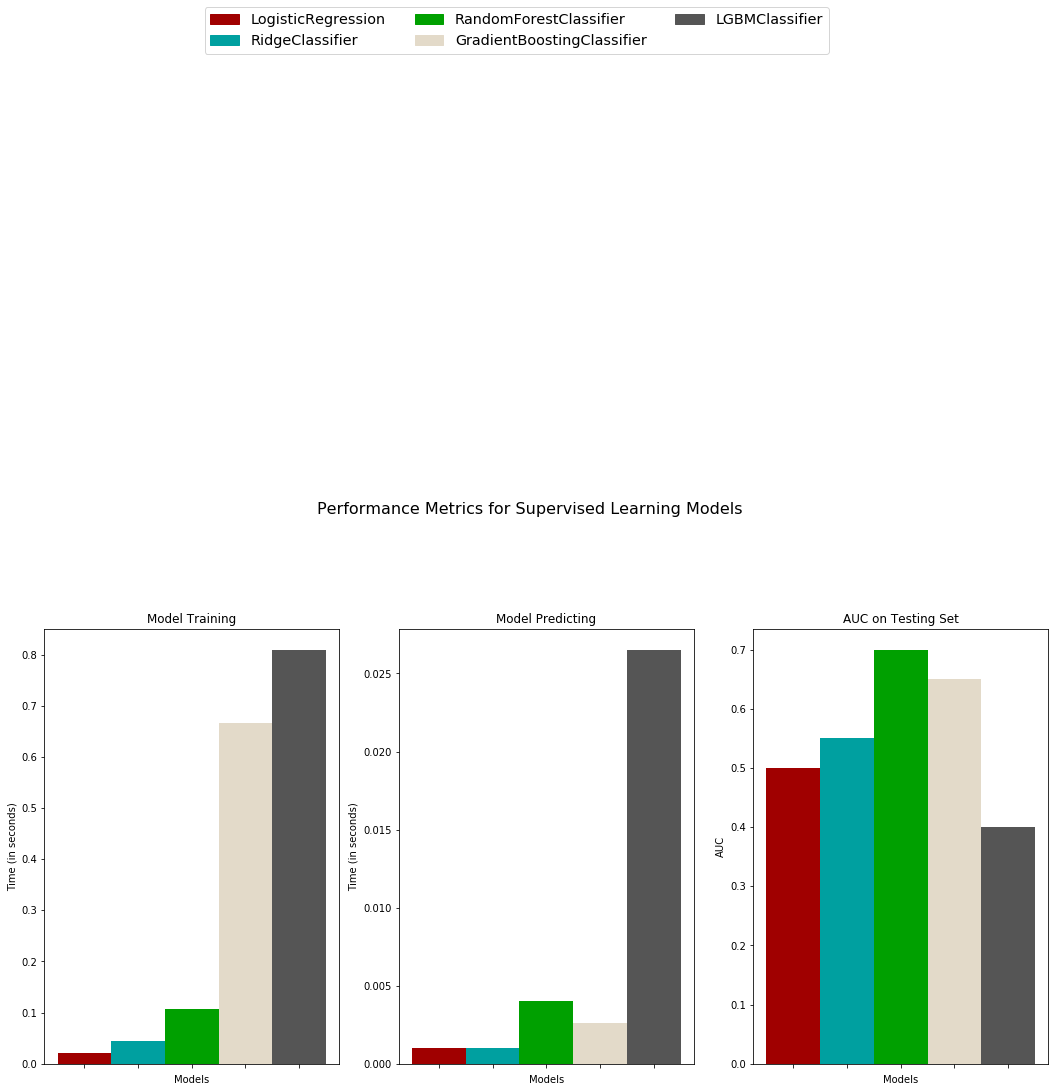

In [19]:
eval_visualize(results)

In [20]:
results

{'LogisticRegression': {0: {'time_train': 0.02124786376953125,
   'time_pred': 0.0010304450988769531,
   'AUC': 0.5}},
 'RidgeClassifier': {0: {'time_train': 0.044141292572021484,
   'time_pred': 0.0010013580322265625,
   'AUC': 0.55}},
 'RandomForestClassifier': {0: {'time_train': 0.10619926452636719,
   'time_pred': 0.003999948501586914,
   'AUC': 0.7}},
 'GradientBoostingClassifier': {0: {'time_train': 0.665719747543335,
   'time_pred': 0.0025968551635742188,
   'AUC': 0.65}},
 'LGBMClassifier': {0: {'time_train': 0.8095955848693848,
   'time_pred': 0.026525497436523438,
   'AUC': 0.4}}}

In [20]:
model = RidgeClassifier ()
model, pred_y =train_predict(model, train_X, train_y, test_X, test_y)

Learner Name : RidgeClassifier
Training     : 0.01 secs / 997 records
Predicting   : 0.0 secs / 7 records
AUC : 0.55

<Learner Params>
 {'alpha': 1.0, 'class_weight': None, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'normalize': False, 'random_state': None, 'solver': 'auto', 'tol': 0.001}


In [26]:
model2=LGBMClassifier()
model2, pred_y =train_predict(model2, train_X, train_y, test_X, test_y)

Learner Name : LGBMClassifier
Training     : 0.63 secs / 997 records
Predicting   : 0.03 secs / 7 records
AUC : 0.4

<Learner Params>
 {'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'presort': 'auto', 'random_state': None, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


In [22]:
param_grid1 ={'boosting_type': ['gbdt'], 
    'objective': ['regression'],
    'random_state': [42],
    'min_data_in_leaf':[3],
    'min_depth':[2],
    'learning_rate': [0.3],
    #'n_estimators': [1000, 3000],
    'n_estimators': [3000],
    'num_leaves': [60, 70, 80],
    'max_bin': [150,200,255,300] }

In [23]:
#CV_lgbm = GridSearchCV(estimator=model2, param_grid=param_grid1, cv=3, verbose=1, scoring='auc')
CV = GridSearchCV(estimator=model2, param_grid=param_grid1, cv=3, verbose=1)
CV.fit(train_X, train_y)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed: 20.4min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'boosting_type': ['gbdt'], 'objective': ['regression'], 'random_state': [42], 'min_data_in_leaf': [3], 'min_depth': [2], 'learning_rate': [0.3], 'n_estimators': [3000], 'num_leaves': [60, 70, 80], 'max_bin': [150, 200, 255, 300]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [21]:
model=GradientBoostingClassifier()
model, pred_y =train_predict(model, train_X, train_y, test_X, test_y)

Learner Name : GradientBoostingClassifier
Training     : 0.57 secs / 997 records
Predicting   : 0.0 secs / 7 records
AUC : 0.55

<Learner Params>
 {'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'presort': 'auto', 'random_state': None, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


print("Best parameter (CV score=%0.3f):" % CV.best_score_)
print(CV.best_params_)

model.set_params(**CV.best_params_)

param_grid2 ={'boosting_type': 'gbdt', 'colsample_bytree': 0.6408160518565532, 'importance_type ': 'gain', 'learning_rate': 0.12849169174434408, 'min_child_samples': 485, 'num_leaves': 55, 'reg_alpha': 0.09393615483039597, 'reg_lambda': 0.5583000823614038, 'subsample_for_bin': 260000, 'subsample': 0.6210375840864458, 'n_estimators': 281}

In [22]:
import lightgbm as lgb
def train_model(train_x, train_y, valid_x, valid_y):
    #params = {'boosting_type': 'gbdt', 'learning_rate': 0.3, 'max_bin': 150, 'min_data_in_leaf': 3, 'min_depth': 2, 'n_estimators': 3000, 'objective': 'regression', 'random_state': 42}
    print('Starting training...')
    # train
    model = lgb.LGBMRegressor(**param_grid2)
    
    model.fit(train_X, train_y eval_set=[(train_x, train_y), (valid_x, valid_y)], verbose= 200, early_stopping_rounds= 200)

    # Record the best iteration
    best_iteration = model.best_iteration_
    return model
    
model=train_model(train_x, train_y, valid_x, valid_y)

SyntaxError: invalid syntax (<ipython-input-22-0c34522f2022>, line 8)

In [23]:
# si utilizamos el proba me calcula las probabilidades
predicted_test = model.predict(test_X)

In [24]:
model.score(test_X, test_y, sample_weight=None)

0.5714285714285714

In [25]:
from sklearn.metrics import mean_absolute_error
def calculate_error(test_y, predicted):
    return mean_absolute_error(test_y, predicted)
#The best possible score is 1.0, lower values are worse.
from sklearn.metrics import explained_variance_score
def variance_score(test_y, predicted):
    return explained_variance_score(test_y, predicted) 
from sklearn.metrics import median_absolute_error
def median_error(test_y, predicted):
    return median_absolute_error (test_y, predicted) 
from sklearn.metrics import r2_score
def r2(test_y, predicted):
    return r2_score(test_y, predicted) 
from sklearn.metrics import mean_squared_error
def mse(test_y, predicted):
    return mean_squared_error(test_y, predicted)

In [26]:
print('Error del modelo=', calculate_error(test_y,predicted_test))
print('Mean squared error=', mse(test_y,predicted_test))
print('Median Error del modelo=', median_error(test_y,predicted_test))
print('R2=', r2(test_y,predicted_test))
print('variance_score=', variance_score(test_y,predicted_test))

Error del modelo= 0.42857142857142855
Mean squared error= 0.42857142857142855
Median Error del modelo= 0.0
R2= -1.1
variance_score= -0.9999999999999998


print('Error del modelo=', calculate_error(np.exp(y_test)-1-log_constant,np.exp(predicted_test)-1-log_constant))
print('Mean squared error=', mse(np.exp(y_test)-1-log_constant,np.exp(predicted_test)-1-log_constant))
print('Median Error del modelo=', median_error(np.exp(y_test)-1-log_constant,np.exp(predicted_test)-1-log_constant))
print('R2=', r2(np.exp(y_test)-1-log_constant,np.exp(predicted_test)-1-log_constant))
print('variance_score=', variance_score(np.exp(y_test)-1-log_constant,np.exp(predicted_test)-1-log_constant))

In [27]:
# Extract feature importances
feature_importance_values = model.feature_importances_
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': feature_importance_values})
feature_importances.sort_values(by='importance', ascending=False)

,feature,importance
33,return_5,0.051582
7,O-C,0.049195
32,return_1,0.048566
5,volume_1,0.048331
11,ratio_avg_price_5_30,0.046362
27,std_volume_30,0.042574
6,H-L,0.042476
0,open,0.038485
20,std_price_5,0.037052
31,ratio_std_volume_30_365,0.033910


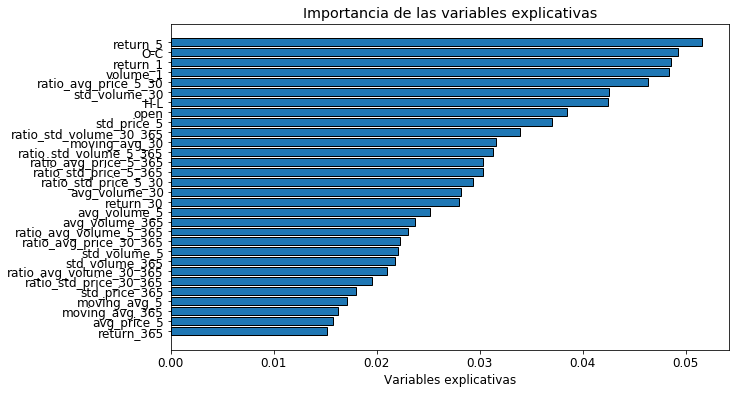

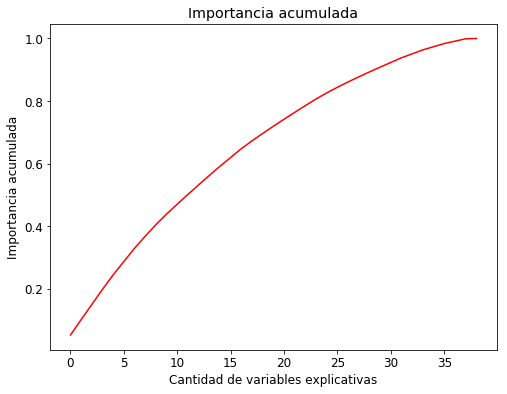

30 features required for 0.90 of cumulative importance


In [28]:
norm_feature_importances = plot_feature_importances(feature_importances)

In [29]:
#del testing
#training= train_x.merge(train_y, how='inner', left_index=True, right_index=True)
testing=test_X.merge(test_y, how='left', left_index=True, right_index=True)

In [30]:
#predicted_test=np.exp(predicted_test)-1-log_constant

In [31]:
#del resultado
resultado=test_y.copy()


In [32]:
predicted_test=pd.DataFrame(predicted_test)
resultado['estimacion']=predicted_test

In [35]:
predicted_test

,0
0,1
1,1
2,1
3,0
4,0
5,1
6,0


In [36]:
test_y

date
2019-12-17 00:00:00.000000    1
2019-12-18 00:00:00.000000    0
2019-12-19 00:00:00.000000    1
2019-12-20 00:00:00.000000    1
2019-12-23 00:00:00.000000    0
2019-12-24 00:00:00.000000    1
2019-12-26 12:35:08.777047    0
Name: Price_Rise, dtype: int64

In [33]:
# collect data for  from 2017-04-22 


In [ ]:
nov_oct=novedades_oct[feats]

In [ ]:
nov_oct.drop_duplicates(inplace=True)

nov_oct.set_index('ean', inplace=True)

In [ ]:
est_nov_oct = model.predict(nov_oct)

In [ ]:
novedades_oct.head()

est_nov_oct=np.exp(est_nov_oct)-1-log_constant

In [37]:
shap.initjs()
# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatBoost, scikit-learn and spark models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

NameError: name 'shap' is not defined

In [ ]:
# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])

In [ ]:
shap.force_plot(explainer.expected_value, shap_values[200,:], X_test.iloc[200,:])

In [ ]:
shap.dependence_plot("modelo1", shap_values, X_test)


In [ ]:
shap.summary_plot(shap_values, X_test)


In [ ]:
instance_to_explain = 0
shap.force_plot(explainer.expected_value[1], shap_value[instance_to_explain], X_test.iloc[instance_to_explain])

In [ ]:
explainer.expected_value


In [ ]:
features= X_test.columns.tolist()
for feat in features:
    shap.dependence_plot(feat, shap_values, X_test, dot_size=100)